In [6]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [30]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [3]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.1
N = 50

500

In [7]:
xint= [-50, 50]
dx = 5
yint = [-50, 50]
dy = 5
zint = [-50, 50]
dz = 5

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);

In [ ]:
M1 = PointsSolutions(p,Δt,N,initial_points,RadauIIA5, 20)
M2 = PointsSolutions(p,Δt,N,initial_points,RK4, 20)

In [22]:
size(M2)

(9261,)

In [26]:
function CorrelationMatrix(M₁, M₂, l, N)
M = zeros(l,N)
for i = 1:l
    for j = 1:N
        M[i,j] = Correlation(M₁[i][:,j],M₂[i][:,j])
    end
end
return M
end

CorrelationMatrix (generic function with 2 methods)

In [ ]:
l = length(initial_points)
M = CorrelationMatrix(M1, M2, l, N);


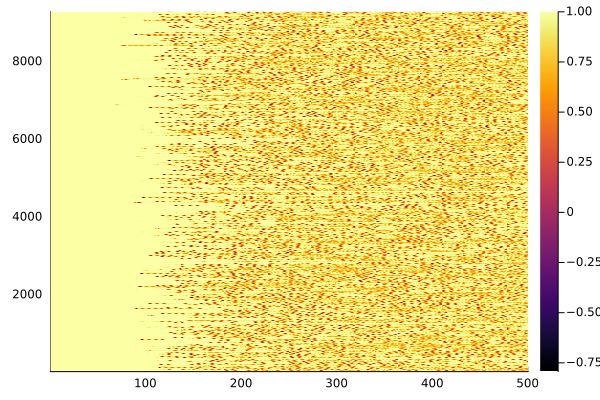

In [28]:
heatmap(M)